# Auto Insurance Case Study

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
plt.style.use('ggplot')
import warnings
warnings.filterwarnings("ignore")

## Loading case study data:

### Loading 2017 auto policies data:

- This data set is a set of personal auto insurance policies taken out in 2017. There are 60,392 policies (rows), of which 10,030 had at least one claim. 

In [2]:
auto_policies_2017 = pd.read_csv("auto_policies_2017.csv")

- Checking dataset shape:

In [3]:
print('Shape of auto_policies_2017 :',auto_policies_2017.shape)

Shape of auto_policies_2017 : (60392, 15)


- Looking at first few rows:

In [4]:
auto_policies_2017.columns

Index(['pol_number', 'pol_eff_dt', 'gender', 'agecat', 'date_of_birth',
       'credit_score', 'area', 'traffic_index', 'veh_age', 'veh_body',
       'veh_value', 'claim_office', 'numclaims', 'claimcst0',
       'annual_premium'],
      dtype='object')

- Renamed few columns for clarity and future analysis:

In [5]:
auto_policies_2017.columns = auto_policies_2017.columns.str.replace("agecat","age_category")
auto_policies_2017.columns = auto_policies_2017.columns.str.replace("numclaims","num_claims")
auto_policies_2017.columns = auto_policies_2017.columns.str.replace("claimcst0","claim_amount")
auto_policies_2017.columns = auto_policies_2017.columns.str.replace("veh_age","vehicle_age")
auto_policies_2017.columns = auto_policies_2017.columns.str.replace("veh_body","vehicle_body")
auto_policies_2017.columns = auto_policies_2017.columns.str.replace("veh_value","vehicle_value")

In [6]:
auto_policies_2017.head(10)

,pol_number,pol_eff_dt,gender,age_category,date_of_birth,credit_score,area,traffic_index,vehicle_age,vehicle_body,vehicle_value,claim_office,num_claims,claim_amount,annual_premium
0,64080188,7/10/2017,M,2.0,1/4/1989,631.0,B,140.9,4,TRUCK,0.924,NaN,0,0.000000,716.53
1,18917133,7/31/2017,M,2.0,6/21/1985,531.0,C,136.5,3,HBACK,1.430,B,1,583.010876,716.53
2,82742606,2/1/2017,M,6.0,7/25/1942,838.0,D,88.8,3,SEDAN,1.100,D,1,159.375757,716.53
3,43601997,10/17/2017,M,5.0,6/8/1959,835.0,E,NaN,2,SEDAN,2.090,NaN,0,0.000000,716.53
4,58746861,4/13/2017,F,4.0,5/16/1967,748.0,C,123.0,3,HBACK,0.803,C,1,143.555642,716.53
5,83346346,11/23/2017,M,5.0,11/2/1956,785.0,B,108.6,2,SEDAN,1.903,NaN,0,0.000000,716.53
6,92111059,11/29/2017,M,3.0,10/31/1976,759.0,E,75.0,4,STNWG,1.452,NaN,0,0.000000,716.53
7,69967688,4/24/2017,F,NaN,11/27/1947,836.0,C,88.5,1,HBACK,1.397,NaN,0,0.000000,716.53
8,58856161,7/19/2017,M,NaN,3/12/1967,688.0,A,50.0,1,SEDAN,2.838,NaN,0,0.000000,716.53
9,57786319,8/31/2017,M,NaN,12/25/1984,503.0,B,NaN,3,HBACK,1.936,B,1,1039.398350,716.53


### Loading auto policies potential customers 2018 data:

- This is a list of 7,464 potential customers for 2018.  

In [7]:
auto_potential_2018 = pd.read_csv("auto_potential_customers_2018.csv")

- Checking dataset shape:

In [8]:
print('Shape of auto_potential_2018 :',auto_potential_2018.shape)

Shape of auto_potential_2018 : (7464, 10)


- Looking at first few rows:

In [9]:
auto_potential_2018.columns

Index(['quote_number', 'gender', 'agecat', 'date_of_birth', 'credit_score',
       'area', 'traffic_index', 'veh_age', 'veh_body', 'veh_value'],
      dtype='object')

- Renamed few columns for clarity and future analysis:

In [10]:
auto_potential_2018.columns = auto_potential_2018.columns.str.replace("agecat","age_category")
auto_potential_2018.columns = auto_potential_2018.columns.str.replace("veh_age","vehicle_age")
auto_potential_2018.columns = auto_potential_2018.columns.str.replace("veh_body","vehicle_body")
auto_potential_2018.columns = auto_potential_2018.columns.str.replace("veh_value","vehicle_value")

In [11]:
auto_potential_2018.head(10)

,quote_number,gender,age_category,date_of_birth,credit_score,area,traffic_index,vehicle_age,vehicle_body,vehicle_value
0,29323463,F,4.0,4/14/1968,750.0,C,124.5,2,HBACK,1.100
1,16732441,M,2.0,10/4/1984,567.0,F,NaN,3,STNWG,2.079
2,68744228,M,4.0,11/30/1962,378.0,D,111.4,3,HDTOP,2.354
3,30875047,F,3.0,5/17/1973,807.0,E,NaN,4,UTE,1.969
4,37049210,M,6.0,10/2/1945,844.0,C,111.0,1,HBACK,1.969
5,90859532,M,1.0,1/19/1995,743.0,C,133.5,1,HBACK,2.090
6,58572612,M,5.0,3/27/1953,647.0,F,156.0,3,HDTOP,2.915
7,32679788,M,4.0,9/20/1964,785.0,A,NaN,2,SEDAN,1.925
8,90845095,F,1.0,1/17/1999,601.0,B,105.2,2,HBACK,1.430
9,97453004,F,3.0,12/2/1979,672.0,C,145.5,2,STNWG,3.905


- Looking at column info in detail:

In [12]:
auto_policies_2017.head(5)

,pol_number,pol_eff_dt,gender,age_category,date_of_birth,credit_score,area,traffic_index,vehicle_age,vehicle_body,vehicle_value,claim_office,num_claims,claim_amount,annual_premium
0,64080188,7/10/2017,M,2.0,1/4/1989,631.0,B,140.9,4,TRUCK,0.924,NaN,0,0.000000,716.53
1,18917133,7/31/2017,M,2.0,6/21/1985,531.0,C,136.5,3,HBACK,1.430,B,1,583.010876,716.53
2,82742606,2/1/2017,M,6.0,7/25/1942,838.0,D,88.8,3,SEDAN,1.100,D,1,159.375757,716.53
3,43601997,10/17/2017,M,5.0,6/8/1959,835.0,E,NaN,2,SEDAN,2.090,NaN,0,0.000000,716.53
4,58746861,4/13/2017,F,4.0,5/16/1967,748.0,C,123.0,3,HBACK,0.803,C,1,143.555642,716.53


In [13]:
auto_policies_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60392 entries, 0 to 60391
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   pol_number      60392 non-null  int64  
 1   pol_eff_dt      60392 non-null  object 
 2   gender          60392 non-null  object 
 3   age_category    55561 non-null  float64
 4   date_of_birth   60392 non-null  object 
 5   credit_score    57591 non-null  float64
 6   area            60392 non-null  object 
 7   traffic_index   56889 non-null  float64
 8   vehicle_age     60392 non-null  int64  
 9   vehicle_body    60392 non-null  object 
 10  vehicle_value   60392 non-null  float64
 11  claim_office    10030 non-null  object 
 12  num_claims      60392 non-null  int64  
 13  claim_amount    60392 non-null  float64
 14  annual_premium  60392 non-null  float64
dtypes: float64(6), int64(3), object(6)
memory usage: 6.9+ MB


In [14]:
auto_policies_2017.describe()

,pol_number,age_category,credit_score,traffic_index,vehicle_age,vehicle_value,num_claims,claim_amount,annual_premium
count,6.039200e+04,55561.000000,57591.000000,56889.000000,60392.000000,60392.000000,60392.000000,60392.000000,6.039200e+04
mean,5.499204e+07,3.488310,662.193190,103.892536,2.673748,1.956051,0.214250,644.875932,7.165300e+02
std,2.587003e+07,1.425133,136.450182,33.688679,1.068058,1.330279,0.552291,3354.631809,6.165288e-10
min,1.000040e+07,1.000000,301.000000,0.000000,1.000000,0.000000,0.000000,0.000000,7.165300e+02
25%,3.280473e+07,2.000000,602.000000,80.300000,2.000000,1.111000,0.000000,0.000000,7.165300e+02
50%,5.500180e+07,3.000000,682.000000,108.300000,3.000000,1.650000,0.000000,0.000000,7.165300e+02
75%,7.729614e+07,5.000000,772.000000,132.000000,4.000000,2.365000,0.000000,0.000000,7.165300e+02
max,9.999838e+07,6.000000,850.000000,207.000000,4.000000,38.016000,5.000000,69478.897830,7.165300e+02


In [15]:
auto_potential_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7464 entries, 0 to 7463
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   quote_number   7464 non-null   int64  
 1   gender         7464 non-null   object 
 2   age_category   6832 non-null   float64
 3   date_of_birth  7464 non-null   object 
 4   credit_score   7109 non-null   float64
 5   area           7464 non-null   object 
 6   traffic_index  7015 non-null   float64
 7   vehicle_age    7464 non-null   int64  
 8   vehicle_body   7464 non-null   object 
 9   vehicle_value  7464 non-null   float64
dtypes: float64(4), int64(2), object(4)
memory usage: 583.2+ KB


In [16]:
auto_potential_2018.describe()

,quote_number,age_category,credit_score,traffic_index,vehicle_age,vehicle_value
count,7.464000e+03,6832.000000,7109.000000,7015.000000,7464.000000,7464.000000
mean,5.504566e+07,3.470433,661.321846,104.416636,2.671758,1.943977
std,2.605332e+07,1.429760,135.368887,33.919748,1.063432,1.288601
min,1.000528e+07,1.000000,301.000000,0.000000,1.000000,0.000000
25%,3.238049e+07,2.000000,600.000000,81.000000,2.000000,1.111000
50%,5.505358e+07,3.000000,680.000000,109.100000,3.000000,1.639000
75%,7.788507e+07,5.000000,769.000000,133.050000,4.000000,2.354000
max,9.997137e+07,6.000000,850.000000,223.700000,4.000000,18.700000


- Looking at duplicate values if any

In [17]:
auto_policies_2017.duplicated().sum()

0

In [18]:
auto_potential_2018.duplicated().sum()

0

- Checking null values:-

In [19]:
policies2017_null_counts = auto_policies_2017.isnull().sum()
policies2017_null_counts[policies2017_null_counts > 0]

age_category      4831
credit_score      2801
traffic_index     3503
claim_office     50362
dtype: int64

<AxesSubplot:>

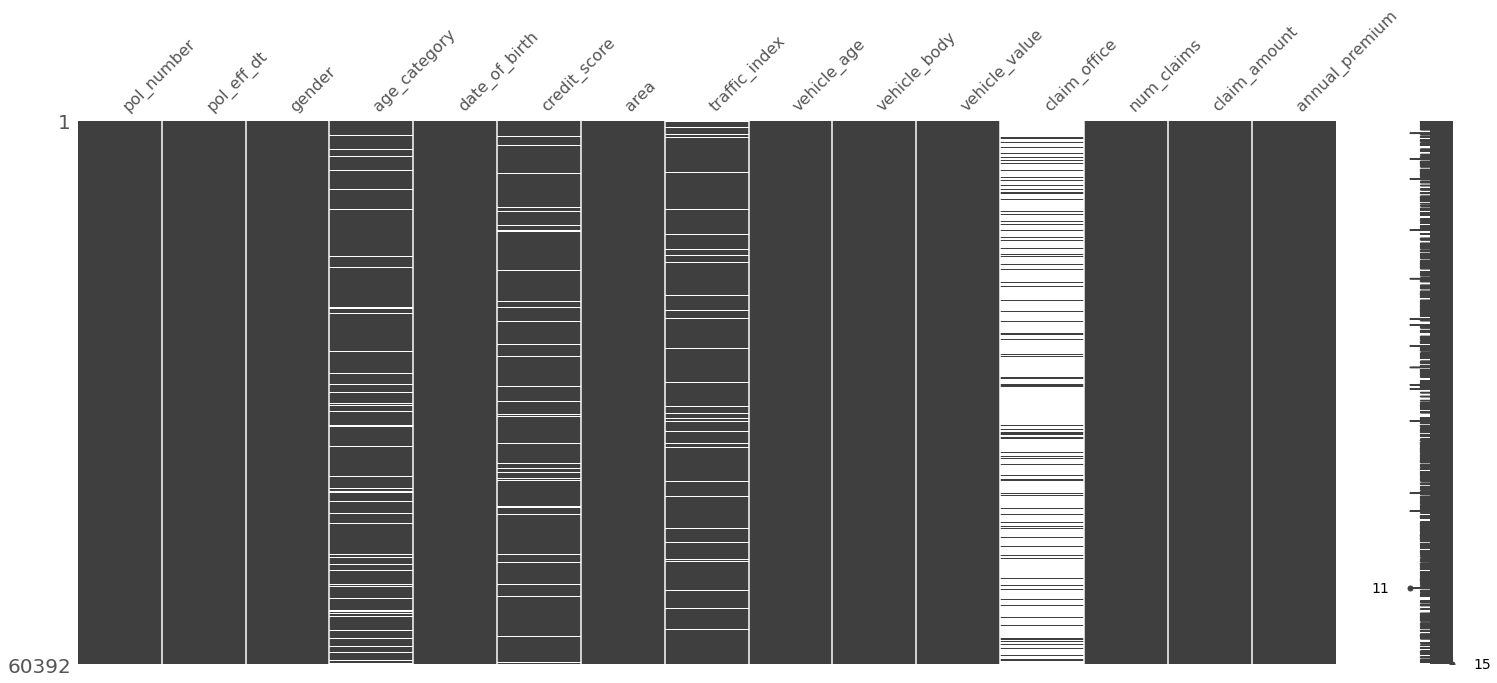

In [20]:
msno.matrix(auto_policies_2017)

In [21]:
potential2018_null_counts = auto_potential_2018.isnull().sum()
potential2018_null_counts[potential2018_null_counts > 0]

age_category     632
credit_score     355
traffic_index    449
dtype: int64

<AxesSubplot:>

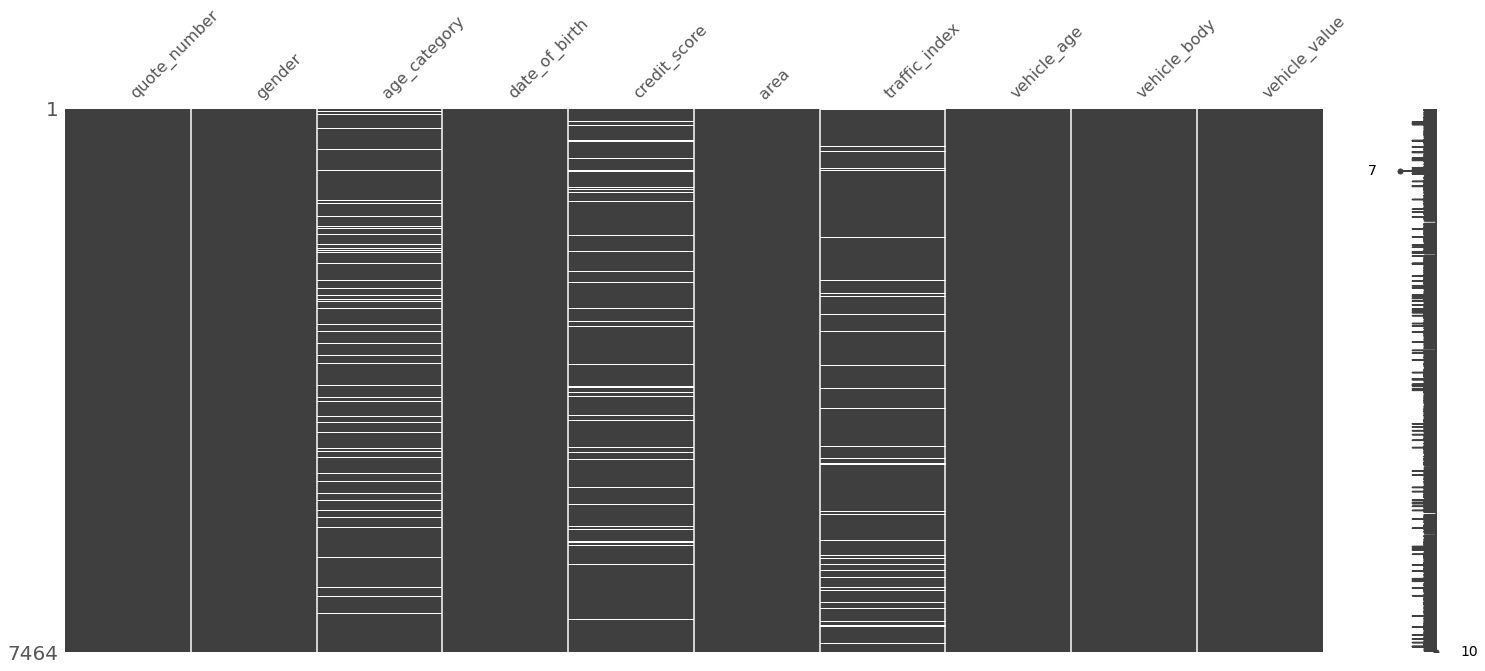

In [22]:
msno.matrix(auto_potential_2018)